Entrega 2. Funciones básicas de OpenCV

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

(512, 512, 3)


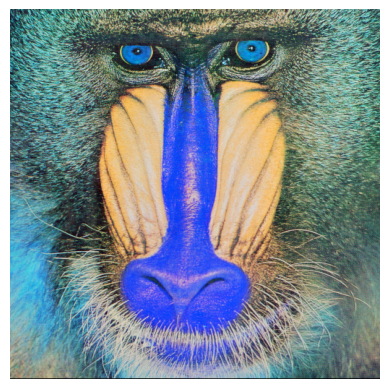

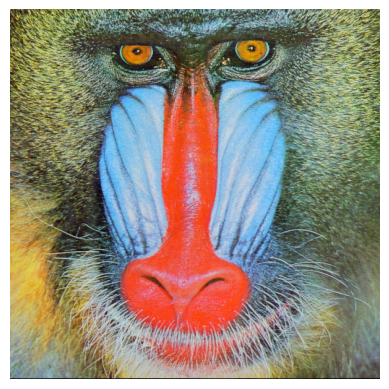

In [3]:
#Lee imagen de archivo
img = cv2.imread('media/mandril.jpg') 
#Muestra dimensiones
print(img.shape)
#Mostramos la original
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img) 
plt.show()

#OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Muestra la imagen tras convertir a RGB
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

(512, 512)


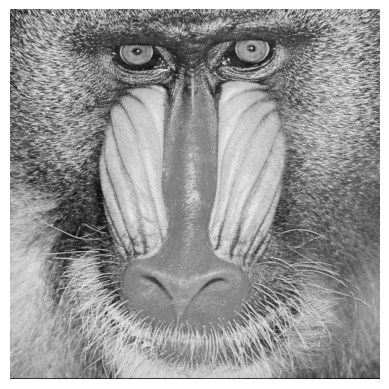

In [4]:
#Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()

[[  0 255   0 ...   0 255   0]
 [255 255   0 ...   0   0 255]
 [  0   0 255 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0 255]
 [  0 255 255 ... 255 255 255]
 [255   0   0 ...   0   0   0]]


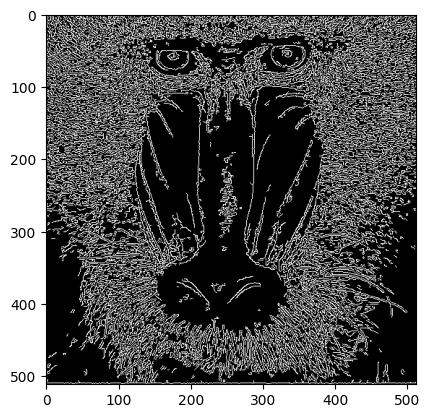

In [5]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
print(canny)
#Muestra resultado
plt.imshow(canny, cmap='gray') 
plt.show()

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

0.79296875
linea max =  0.79296875
max * 0.95 =  0.7533203125
1


(0.0, 512.0)

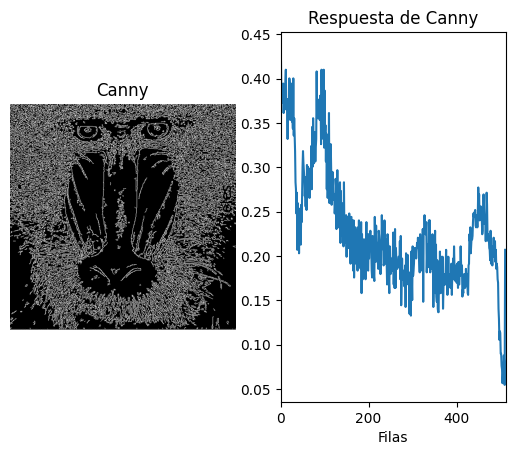

In [22]:




###Cuenta de píxeles blancos por filas
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:, 0] / (255 * canny.shape[1])
#print(row_counts)
print(max(rows))
#rowws = [np.count_nonzero(rows = 255) for x in canny]
#print(rowws)

#Quitamos la ultima fila de píxeles
max_value = max(rows)
mask = rows != max_value
new_rows = rows[mask]

#Calculamos la fila con más píxeles blancos 
new_max = max(rows)

#Calculamos el número de valores que superan 0'95*máximo
threshold = 0.95 * new_max
print("linea max = ", new_max)
print("max * 0.95 = ", threshold)
mask_threshold = rows >= threshold
sum_big_vals = np.sum(mask_threshold)

print(sum_big_vals)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(new_rows)
#Rango en x definido por las filas
plt.xlim([0, canny.shape[0] ])

TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

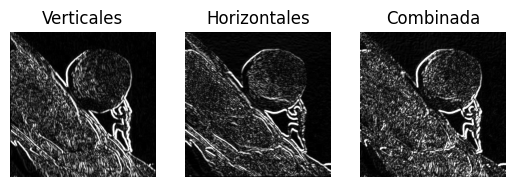

In [20]:
img2 = cv2.imread('media/sisifogrande.jpg')

img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobel, cmap='gray') #Sin convertir escala
plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

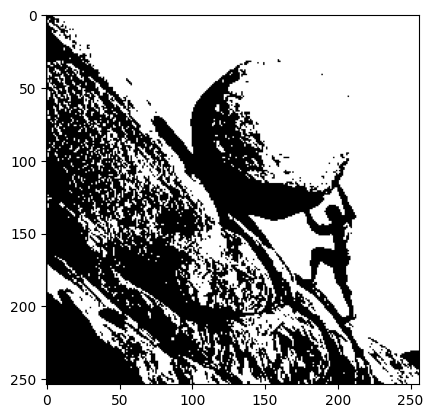

0.98828125
0.9881889763779528


In [36]:
umbral = 100
res, umbralImg = cv2.threshold(gris, umbral, 255, cv2.THRESH_BINARY)
plt.imshow(umbralImg, cmap='gray')
plt.show()

row_counts = cv2.reduce(umbralImg, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:, 0] / (255 * umbralImg.shape[1])
print(max(rows))

col_counts = cv2.reduce(umbralImg, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * umbralImg.shape[0])
print(max(cols))

TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

In [10]:
cam = cv2.VideoCapture(0)

while(True):      
    ret, frame = cam.read()

    if ret:
        
        kernel = np.array([
                            [0, -1,  0],
                            [-1,  4, -1],
                            [0, -1,  0]
                            ])
        laplace = cv2.filter2D(frame, ddepth=-1, kernel=kernel)
        cv2.imshow('Cam', laplace)        

    if cv2.waitKey(20) == 27:
        break
  
cam.release()
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.

In [23]:
# Añadir un Haar Cascade classifier para deteccion de caras y la máscara
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
mandril = cv2.imread("media/mandril.jpg")

cam = cv2.VideoCapture(0)

while(True):      
    ret, frame = cam.read()

    if ret:
        # Convertir el frame a un plano de gris
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Hacer uso del clasificador para obtener las caras
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1, minSize=(30,30))

        for (x, y, w, h) in faces: 
            # Colocar la imagen en donde se encuentran las caras
            mandril = cv2.resize(mandril, (w, h))
            frame[y:y+h, x:x+w] = mandril

    
        cv2.imshow('Face detection', frame)
  
    if cv2.waitKey(20) == 27:
        break
  
cam.release()
cv2.destroyAllWindows()